# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [47]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('./wednesday_data/corpus.pkl')
data

,transcript
E01,"Original release date: November 23, 2022 Wedne..."
E02,"Original release date: November 23, 2022 Wedne..."
E03,"Original release date: November 23, 2022 Wedne..."
E04,"Original release date: November 23, 2022 Wedne..."
E05,"Original release date: November 23, 2022 32 ye..."
E06,"Original release date: November 23, 2022 Wedne..."
E07,"Original release date: November 23, 2022 At Ma..."
E08,"Original release date: November 23, 2022 Wedne..."


In [48]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
E01,"Original release date: November 23, 2022 Wedne...",0.066309,0.537811
E02,"Original release date: November 23, 2022 Wedne...",0.034124,0.529663
E03,"Original release date: November 23, 2022 Wedne...",0.091650,0.541155
E04,"Original release date: November 23, 2022 Wedne...",0.093767,0.551883
E05,"Original release date: November 23, 2022 32 ye...",0.057078,0.531146
E06,"Original release date: November 23, 2022 Wedne...",0.051906,0.530136
E07,"Original release date: November 23, 2022 At Ma...",0.014201,0.524185
E08,"Original release date: November 23, 2022 Wedne...",0.021221,0.576332


In [49]:
ep = ['E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08']

In [50]:
data.index

Index(['E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E07', 'E08'], dtype='object')

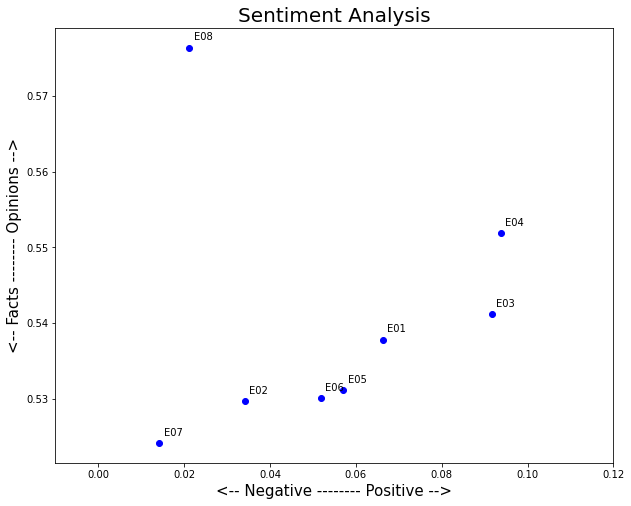

In [51]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, ep in enumerate(data.index):
    x = data.polarity.loc[ep]
    y = data.subjectivity.loc[ep]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, ep, fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [52]:
# Split each ep into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [53]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
E01,"Original release date: November 23, 2022 Wedne...",0.066309,0.537811
E02,"Original release date: November 23, 2022 Wedne...",0.034124,0.529663
E03,"Original release date: November 23, 2022 Wedne...",0.091650,0.541155
E04,"Original release date: November 23, 2022 Wedne...",0.093767,0.551883
E05,"Original release date: November 23, 2022 32 ye...",0.057078,0.531146
E06,"Original release date: November 23, 2022 Wedne...",0.051906,0.530136
E07,"Original release date: November 23, 2022 At Ma...",0.014201,0.524185
E08,"Original release date: November 23, 2022 Wedne...",0.021221,0.576332


In [54]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
# list_pieces

In [55]:
# The list has 8 elements, one for each transcript
len(list_pieces)

8

In [56]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [57]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.12164634146341463,
  0.17939297309833022,
  0.116003620864732,
  0.10869295634920635,
  -0.0005540581012279126,
  -0.010968778696051435,
  0.026388888888888896,
  0.02826199924414211,
  0.04204956836535783,
  -0.011835049335049334],
 [-0.011136712749615975,
  0.10612745098039217,
  -0.09125763125763124,
  0.08496753246753247,
  0.1457939578152344,
  -0.07758733514547468,
  -0.02915209790209791,
  0.002611664820967136,
  0.07225529391166062,
  0.1218726379440665],
 [0.0456980100003356,
  0.0998907553798858,
  0.19967334494773517,
  0.21242236024844718,
  0.07897478070175441,
  0.07783024267399268,
  0.023777776133733178,
  0.06980519480519483,
  -0.010158232572025692,
  0.04511494252873565],
 [0.07987452926477319,
  0.17265625,
  0.1865849758706902,
  0.013778998778998774,
  -0.02908781033781034,
  0.2091595804988662,
  0.13430266203703703,
  -0.005705705705705719,
  0.13935489060489056,
  -0.018337912087912103],
 [0.10818903318903317,
  0.06994273088023087,
  0.09733862433862435,
 

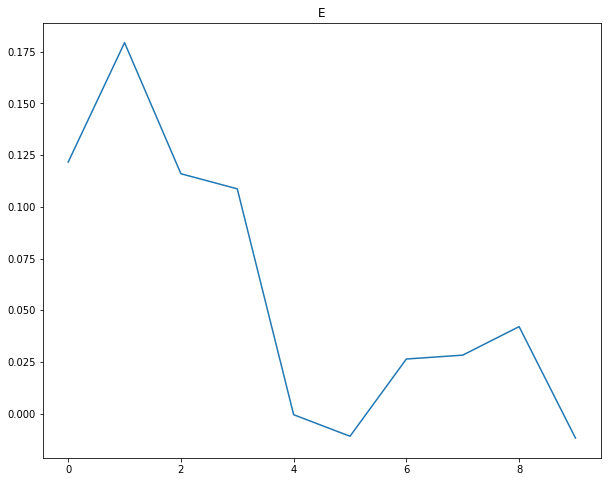

In [58]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(ep[0])
plt.show()

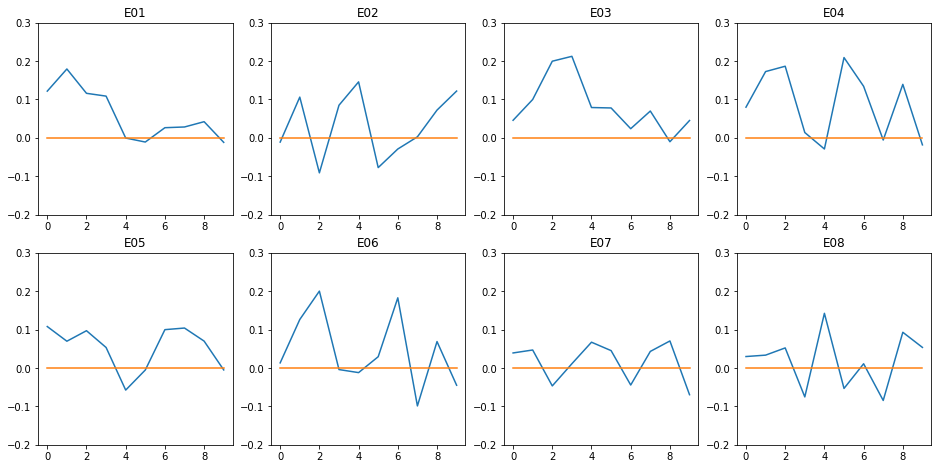

In [59]:
# Show the plot for all eps
plt.rcParams['figure.figsize'] = [16, 12]

for index, ep in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(ep)
    plt.ylim(ymin=-.2, ymax=.3)
    # plt.xticks(np.arange(1, 9, 1))
    
plt.show()

### Assignments:
1. Classify all comedian according to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [63]:
data.drop(['transcript'], axis=1)

,polarity,subjectivity
E01,0.066309,0.537811
E02,0.034124,0.529663
E03,0.091650,0.541155
E04,0.093767,0.551883
E05,0.057078,0.531146
E06,0.051906,0.530136
E07,0.014201,0.524185
E08,0.021221,0.576332


In [65]:
list_pieces2 = []
for t in data.transcript:
    split = split_text(t, 15)
    list_pieces2.append(split)
    
# list_pieces

In [66]:
len(list_pieces2)

8

In [67]:
len(list_pieces2[0])

15

In [72]:
polarity_transcript2 = []
for lp in list_pieces2:
    polarity_piece2 = []
    for p in lp:
        polarity_piece2.append(TextBlob(p).sentiment.polarity)
    polarity_transcript2.append(polarity_piece2)
    
polarity_transcript2

[[0.08125,
  0.11648065476190478,
  0.24408447408447406,
  0.11934258551905615,
  0.12977891156462587,
  0.08731962481962482,
  -0.040214866434378625,
  0.015810185185185188,
  0.04181096681096682,
  -0.023333333333333327,
  0.03636904761904765,
  0.07021072796934866,
  0.060774911816578486,
  -0.016344246031746036,
  0.011309523809523804],
 [0.014002267573696143,
  -0.015800865800865795,
  0.15075757575757576,
  -0.041075837742504395,
  -0.03611111111111112,
  0.04047805642633228,
  0.0792584940312213,
  0.22305555555555548,
  -0.15937826541274813,
  -0.040256734006734005,
  0.05199999999999999,
  -0.04125661375661375,
  0.1278151646822053,
  0.07208224356661858,
  0.1189484126984127],
 [0.10085708273208273,
  0.042929292929292914,
  0.09268518518518519,
  0.2574514991181658,
  0.18774038461538461,
  0.18524531024531027,
  0.12466666666666666,
  0.029589843750000004,
  0.1030366443452381,
  -0.003316921657986089,
  -0.037265151515151515,
  0.15574945887445885,
  0.03678571428571427,
 

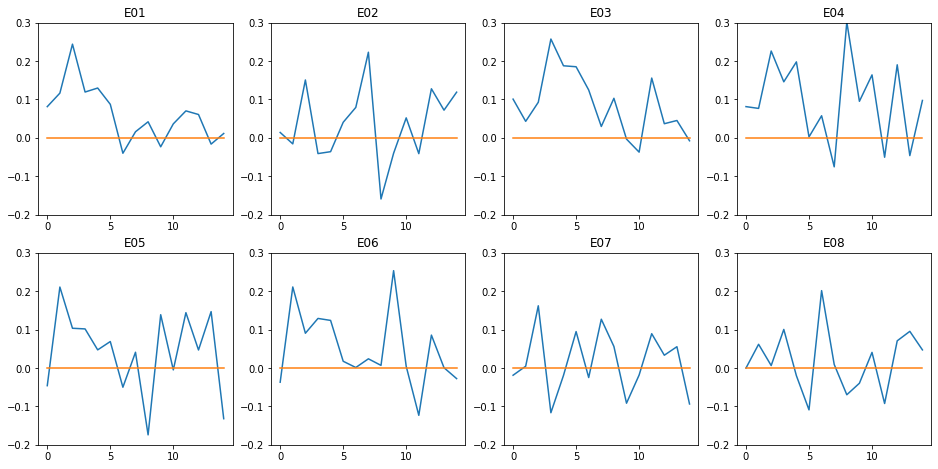

In [73]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, ep in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript2[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(ep)
    plt.ylim(ymin=-.2, ymax=.3)
    # plt.xticks(np.arange(1, 9, 1))
    
plt.show()